In [1]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 9.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 10.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------- -------- 1.8/2.3 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.8/7.0 MB 9.1 MB/s eta 0:00:01
   ---------------------- ----------------- 3.9/7.0 MB 9.4 MB/s eta 0:00:01
   ----------------------------------- ---- 6.3/7.0 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 10.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# import data from csv and store in variable df
df=pd.read_csv("retail_data.csv")

In [7]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
#statics summary
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [12]:
# CONVERT DATE COLUMN TO DATETIME
df["Date"]=pd.to_datetime(df["Date"])

In [13]:
#CREATE MONTH COLUMN
df["Month"]=df["Date"].dt.to_period("M")

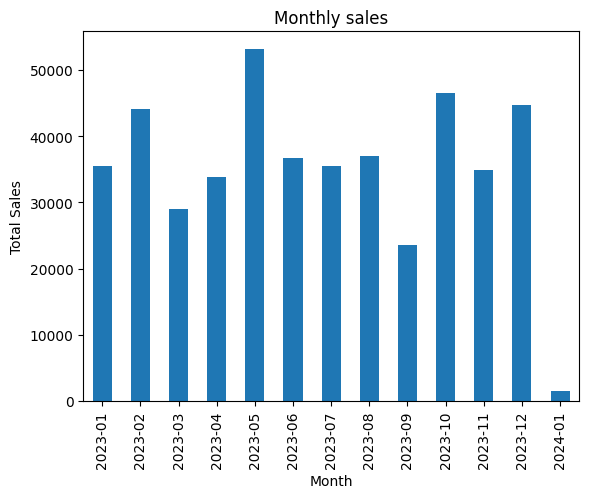

In [20]:
monthly_sales=df.groupby("Month")["Total Amount"].sum()

plt.figure()
monthly_sales.plot(kind="bar")
plt.title("Monthly sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

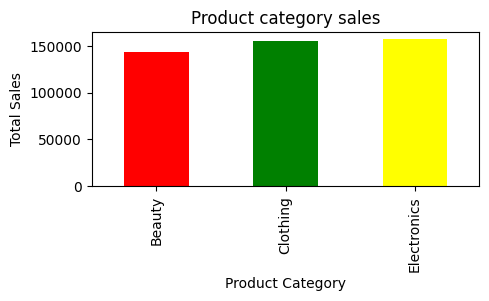

In [27]:
cat_sales=df.groupby("Product Category")["Total Amount"].sum()
colors=["red","green","yellow"]
plt.figure(figsize=(5,2))   # creates a new graph and size of graph
cat_sales.plot(kind="bar",color=colors)  ## for the colors you want
plt.title("Product category sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

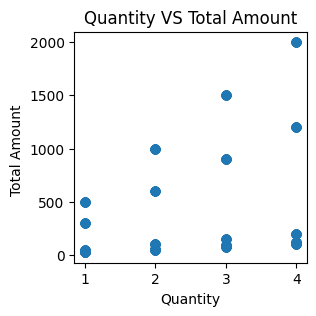

In [30]:
plt.figure(figsize=(3,3))
plt.scatter(df["Quantity"],df["Total Amount"])
plt.title("Quantity VS Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount ")
plt.show()

In [31]:
df.groupby("Age")["Total Amount"].sum()

Age
18    11215
19    14870
20     8645
21    12585
22    13700
23     8220
24     5415
25     9900
26    13980
27     9385
28     8670
29     6570
30     9790
31    10220
32     5550
33     6240
34    16785
35    11290
36     9105
37    11650
38    11100
39     4595
40     9415
41     5650
42     8500
43    17970
44     7560
45     6325
46    13090
47    12505
48     7240
49     5110
50     9845
51    16065
52     7040
53     9510
54    10505
55     9780
56     9440
57     9290
58     7395
59     9470
60    11590
61     6730
62     8120
63     9250
64     9125
Name: Total Amount, dtype: int64

In [32]:
df.groupby("Gender")["Total Amount"].sum()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64